In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import scipy.optimize as sco
import scipy.interpolate as sci




In [2]:
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt

[0.77483743 0.84936582 0.91225408 0.96000544 0.9898478  1.
 0.9898478  0.96000544 0.91225408 0.84936582 0.77483743]


Text(0.5, 0, 'Sample')

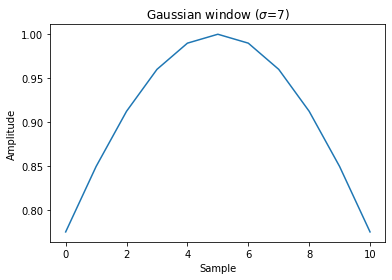

In [3]:
window = signal.gaussian(11, std=7)
print(window)
plt.plot(window)
plt.title(r"Gaussian window ($\sigma$=7)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

-0.003 0.004
0.002 0.005
0.006 0.007


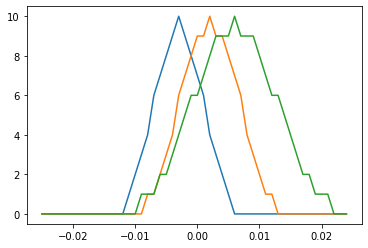

In [478]:
from matplotlib import pyplot as mp
import numpy as np
from functools import reduce

def gaussian(x, mu, sig):
    return (np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))*10).astype(int)

x_values = np.arange(-0.025,0.025,0.001)

Synthetic_Stocks = []

for mu, sig in [(-0.003, 0.004), (0.002, 0.005), (0.006, 0.007)]:
    

    print(mu, sig)
    
    mp.plot(x_values, gaussian(x_values, mu, sig))
    
    values = gaussian(x_values, mu, sig)


    Final_Stock = []

    for idx,x in enumerate(values):
        a = np.empty(x)
        a.fill(round(x_values[idx],3))
        
        Final_Stock.extend(list(a))

    
    Synthetic_Stocks.append(Final_Stock)
    
    



In [541]:
#Fill with zeros
maxL = max([len(Synthetic_Stocks[0]),len(Synthetic_Stocks[1]),len(Synthetic_Stocks[2])])
for i in range(0,3):
    a = np.empty(maxL - len(Synthetic_Stocks[i]))
    a.fill(0)
    Synthetic_Stocks[i].extend(a)
    print('mean {}'.format(np.mean(Synthetic_Stocks[i])))

    

mean -0.0017307692307692308
mean 0.0014102564102564104
mean 0.006


In [480]:
Synthetic_Stocks.append([0 for x in range(0, maxL)])

In [465]:
import random
random.shuffle(Synthetic_Stocks[0])

In [421]:
initial_Value = 1000
for a in range(0,3):
    for i,num in enumerate(Synthetic_Stocks[a]):
        if i == 0:
            Synthetic_Stocks[a][i] = initial_Value
        else: 
            if Synthetic_Stocks[a][i]==0.0:
                Synthetic_Stocks[a][i] = Synthetic_Stocks[a][i-1]
            else:
                Synthetic_Stocks[a][i] = Synthetic_Stocks[a][i-1] + Synthetic_Stocks[a][i-1]*Synthetic_Stocks[a][i]
        
    

[[1000,
  995.0,
  995.0,
  992.015,
  992.015,
  984.07888,
  984.07888,
  984.07888,
  979.1584856000001,
  979.1584856000001,
  974.262693172,
  973.288430478828,
  973.288430478828,
  966.4754114654762,
  966.4754114654762,
  965.5089360540107,
  965.5089360540107,
  964.5434271179568,
  956.8270797010131,
  956.8270797010131,
  956.8270797010131,
  956.8270797010131,
  956.8270797010131,
  956.8270797010131,
  956.8270797010131,
  956.8270797010131,
  957.7839067807141,
  955.8683389671527,
  956.8242073061199,
  950.1264378549771,
  952.026690730687,
  952.026690730687,
  952.026690730687,
  948.2185839677643,
  945.373928215861,
  945.373928215861,
  941.5924325029976,
  941.5924325029976,
  941.5924325029976,
  941.5924325029976,
  941.5924325029976,
  941.5924325029976,
  941.5924325029976,
  941.5924325029976,
  941.5924325029976,
  940.6508400704946,
  942.5321417506356,
  943.4746738923862,
  943.4746738923862,
  937.8138258490319,
  937.8138258490319,
  937.8138258490319,


In [447]:
import datetime

start = datetime.datetime.strptime("01-01-2020", "%d-%m-%Y")
date_generated = [(start + datetime.timedelta(days=x)).strftime('%Y%m%d') for x in range(0, maxL)]

for date in date_generated[:5]:
    print(date)
Cash_Change_1 = [1 for x in range(0, maxL)]

20200101
20200102
20200103
20200104
20200105


In [455]:

synthetic_df = pd.DataFrame(list(zip(Synthetic_Stocks[0], Synthetic_Stocks[1],Synthetic_Stocks[2] )),columns =['Stock1', 'Stock2','Stock3'])
dates_df = pd.DataFrame(list(zip(date_generated,date_generated,date_generated)),columns =['Stock1', 'Stock2','Stock3'])
Cash_Change_1_df = pd.DataFrame(list(zip(Cash_Change_1,Cash_Change_1,Cash_Change_1)),columns =['Stock1', 'Stock2','Stock3'])
dates_df_squezed = pd.DataFrame(dates_df.stack().squeeze()).reset_index().drop(columns=['level_0','level_1'])
dates_df_squezed.columns = ['datadate']
Cash_Change_1_df = pd.DataFrame(Cash_Change_1_df.stack().squeeze()).reset_index().drop(columns=['level_0','level_1'])
df1_close = pd.DataFrame(synthetic_df.stack().squeeze()).reset_index().drop(columns=['level_0'])
df1_final = pd.concat([df1_close,dates_df_squezed,Cash_Change_1_df], axis=1)
df1_final.columns =['tic', 'daily_return','datadate','CashChange']
df1_final.loc[df1_final.tic == 'Stock1', 'tic'] = 'AAPL'
df1_final.loc[df1_final.tic == 'Stock2', 'tic'] = 'CL=F'
df1_final.loc[df1_final.tic == 'Stock3', 'tic'] = 'TSLA'
df1_final =df1_final[['datadate', 'daily_return','tic','CashChange']]

,level_1,0,datadate,0
0,Stock1,1000.000000,20200101,1
1,Stock2,1000.000000,20200101,1
2,Stock3,1000.000000,20200101,1
3,Stock1,995.000000,20200102,1
4,Stock2,993.000000,20200102,1
...,...,...,...,...
463,Stock2,1254.625783,20200603,1
464,Stock3,2505.514137,20200603,1
465,Stock1,762.632316,20200604,1
466,Stock2,1254.625783,20200604,1


In [540]:
synthetic_df = df1_final

In [458]:
synthetic_df.to_csv('synthetic_portolio_ready.csv')

In [305]:
asset_data = pd.read_csv("portfolio.csv")

In [507]:
# Create a list of symbols
symbols = [
  "TSLA", "MSFT", "CL=F", 'Cash'
]

In [490]:
synthetic_df = pd.DataFrame(list(zip(Synthetic_Stocks[0], Synthetic_Stocks[1],Synthetic_Stocks[2], Synthetic_Stocks[3] )),columns =['Stock1', 'Stock2','Stock3','Cash'])

asset_data = synthetic_df
daily_returns = synthetic_df
daily_returns

,Stock1,Stock2,Stock3,Cash
0,-0.011,-0.008,-0.009,0
1,-0.010,-0.007,-0.008,0
2,-0.010,-0.006,-0.007,0
3,-0.009,-0.006,-0.006,0
4,-0.009,-0.005,-0.006,0
...,...,...,...,...
151,0.000,0.000,0.018,0
152,0.000,0.000,0.018,0
153,0.000,0.000,0.019,0
154,0.000,0.000,0.020,0


In [489]:
# Compute daily simple returns
daily_returns = (
  asset_data.pct_change()
            .dropna(
              # Drop the first row since we have NaN's
              # The first date 2011-09-13 does not have a value since it is our cut-off date
              axis = 0,
              how = 'any',
              inplace = False
              )
)
# Examine the last 5 rows
daily_returns

,Stock1,Stock2,Stock3,Cash


In [542]:
daily_returns.mean()

Stock1   -0.001731
Stock2    0.001410
Stock3    0.006000
Cash      0.000000
dtype: float64

In [543]:
# Function for computing portfolio return
def portfolio_returns(weights):
    return (np.sum(daily_returns.mean() * weights)) * 251

In [544]:
# Function for computing standard deviation of portfolio returns
def portfolio_sd(weights):
    return np.sqrt(np.transpose(weights) @ (daily_returns.cov() * 251) @ weights)

In [545]:
# instantiate empty list containers for returns and sd
list_portfolio_returns = []
list_portfolio_sd = []
# For loop to simulate 5000 random weight vectors (numpy array objects)
for p in range(5000):
  # Return random floats in the half-open interval [0.0, 1.0)
    weights = np.random.random(size = 4) 
    # Normalize to unity
    # The /= operator divides the array by the sum of the array and rebinds "weights" to the new object
    weights /= np.sum(weights) 
    # Lists are mutable so growing will not be memory inefficient
    list_portfolio_returns.append(portfolio_returns(weights))
    list_portfolio_sd.append(portfolio_sd(weights))
    # Convert list to numpy arrays
    port_returns = np.array(object = list_portfolio_returns)
    port_sd = np.array(object = list_portfolio_sd)

In [546]:
# Max expected return
round(max(port_returns), 4)


1.4026

In [547]:
# Min expected return
round(min(port_returns), 4)

-0.3505

In [548]:
# Max sd
round(max(port_sd), 4)


0.0928

In [549]:
round(min(port_sd), 4)

0.0057

In [565]:
# User defined Sharpe ratio function
# Negative sign to compute the negative value of Sharpe ratio
def sharpe_fun(weights):
    return (-portfolio_returns(weights))

In [566]:
# We use an anonymous lambda function
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [567]:
# This creates 12 tuples of (0, 1), all of which exist within a container tuple
# We essentially create a sequence of (min, max) pairs
bounds = tuple(
  (0, 1) for w in weights
)

In [568]:
bounds

((0, 1), (0, 1), (0, 1), (0, 1))

In [569]:
# Repeat the list with the value (1 / 12) 12 times, and convert list to array
equal_weights = np.array(
  [1 / len(symbols)] * len(symbols)
)
equal_weights

array([0.25, 0.25, 0.25, 0.25])

In [570]:
# Minimization results
max_sharpe_results = sco.minimize(
  # Objective function
  fun = sharpe_fun, 
  # Initial guess, which is the equal weight array
  x0 = equal_weights, 
  method = 'SLSQP',
  bounds = bounds, 
  constraints = constraints
)
max_sharpe_results

     fun: -1.5059999999999993
     jac: array([ 0.43442307, -0.35397437, -1.506     ,  0.        ])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([3.05311332e-16, 0.00000000e+00, 1.00000000e+00, 1.38777878e-16])

In [571]:
# Extract the weight composition array
for i in range(0,4):
    w = round(max_sharpe_results["x"][i],10)
    print(w)

0.0
0.0
1.0
0.0


In [526]:
# Expected return
max_sharpe_port_return = portfolio_returns(max_sharpe_results["x"])
round(max_sharpe_port_return, 4)

1.4291

In [527]:
# Standard deviation
max_sharpe_port_sd = portfolio_sd(max_sharpe_results["x"])
round(max_sharpe_port_sd, 4)



0.0935

In [516]:
# Sharpe ratio
max_sharpe_port_sharpe = max_sharpe_port_return / max_sharpe_port_sd
round(max_sharpe_port_sharpe, 4)

15.28

In [523]:
# Minimize sd
min_sd_results = sco.minimize(
  # Objective function
  fun = portfolio_sd, 
  # Initial guess, which is the equal weight array
  x0 = equal_weights, 
  method = 'SLSQP',
  bounds = bounds, 
  constraints = constraints
)

In [518]:
# Expected return
min_sd_port_return = portfolio_returns(min_sd_results["x"])
round(min_sd_port_return, 4)

0.0

In [519]:
# Standard deviation
min_sd_port_sd = portfolio_sd(min_sd_results["x"])
round(min_sd_port_sd, 4)

0.0

In [520]:
# Sharpe ratio
min_sd_port_sharpe = min_sd_port_return / min_sd_port_sd
round(min_sd_port_sharpe, 4)

12.2646

In [521]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [522]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2018,1,1)
end = datetime.datetime(2022,11,19)

In [ ]:
def get_stock(ticker):
    data = web.DataReader(f"{ticker}","yahoo",start,end)
    data[f'{ticker}'] = data["Close"]
    data = data[[f'{ticker}']] 
    print(data.head())
    return data 

In [ ]:
pfizer = get_stock("PFE")
jnj = get_stock("JNJ")

In [ ]:
portfolio = asset_data
portfolio.to_csv("portfolio.csv", index=False)

In [ ]:
portfolio = pd.read_csv("portfolio.csv")



In [ ]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage


mu = mean_historical_return(portfolio)
S = CovarianceShrinkage(portfolio).ledoit_wolf()

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print(dict(cleaned_weights))

In [ ]:
ef.portfolio_performance(verbose=True)

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(portfolio)

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=1000)

allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))